# One Ring To Rule Them All

## Tracking Weight Changes with the Scale, Apple Watch and the iPhone Health App

[Close Your Rings](https://www.apple.com/watch/close-your-rings/) is a practice that is familiar to many Apple Watch wearers. There are three rings that represent daily goals. They are:

1. Move Ring
    
    The number of active calories to burn per day. The number is set by the user.


2. Exercise Ring
    
    The number of exercise minutes per day. Apple sets the goal to 30 minutes. Apple defines exercise as a brisk activity. 



3. Stand Ring

    Apple says that the Stand Ring "measures how often your stand up and move around over the course of 12 hours."
    
    
The Apple Watch measures the move-calories burned, the exercise minutes, and the number of times one stands up and moves during the day. It syncs these data with the iPhone's Health App. Other data that the Apple Watch transmits to the the Health app include heart rate and steps. The iPhone Health App takes these data and displays them graphically in daily, weekly, monthly and annual views. These graphical charts provide a good way to track different health metrics.

I extracted the data from the iPhone App to study and view the data in ways that the Health App does not provide. In this story, I combine my weight data and rings-closing data to derive some understanding of their relationship. 


### Setup

In [1]:
import pathlib

In [2]:
import pandas as pd

In [3]:
home = pathlib.Path.home()

In [4]:
study_path = f"{home}/small-data/study/apple-watch-health-tracking/story-data"

#### Load weight data

In [5]:
interval_weights = pd.read_csv(f"{study_path}/month_firstdate_intervals_weights.csv")

In [6]:
interval_weights = interval_weights.reset_index()

### Frequency of Weight-Tracking and Weight Changes

In [7]:
interval_activity_counts = pd.read_csv(f"{study_path}/month_firstdate_intervals_activity_counts.csv")

In [8]:
interval_activity_frequency_weight = pd.merge(interval_weights, 
                                              interval_activity_counts, 
                                              left_on='interval_key', 
                                              right_on='interval_key')

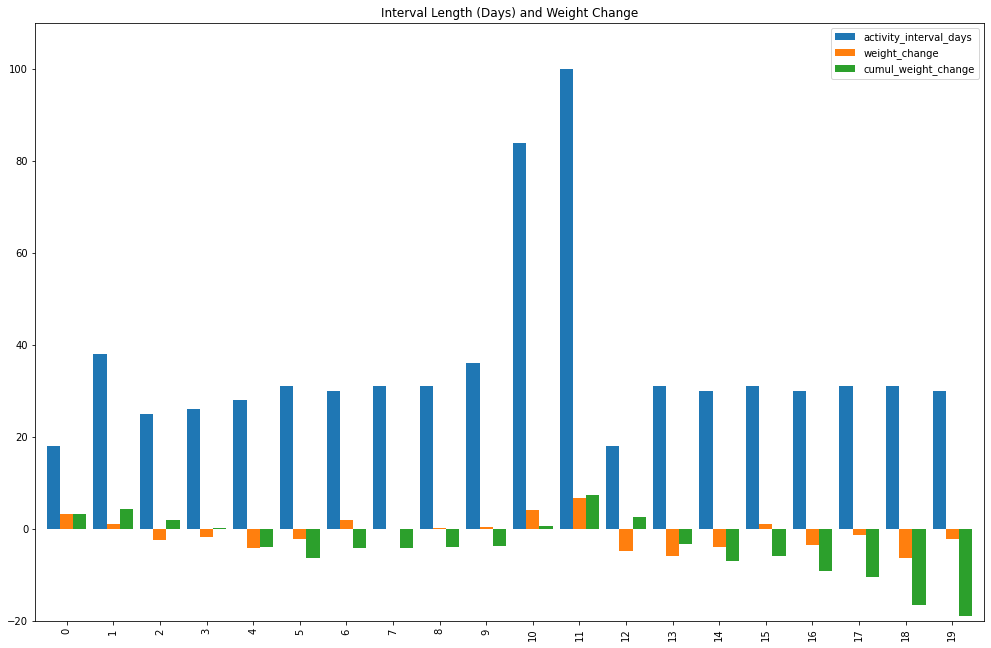

In [9]:
interval_weight_change_plot = interval_activity_frequency_weight.plot.bar(
    title="Interval Length (Days) and Weight Change",
    y=["activity_interval_days", "weight_change", "cumul_weight_change"],
    figsize=(17, 11), width=0.85, ylim=(-20, 110))

An **interval** represents a month. Each interval starts on the first weigh-in day of the month, which is not always the first of the month. There can be more than one month between two intervals. For my weight data, the longest duration between two intervals is 100 days (intervals 10 and 11).

### Closing Rings and Weight Changes

In [10]:
interval_activity_totals = pd.read_csv(f"{study_path}/month_firstdate_intervals_activity_totals.csv")

In [11]:
interval_activity_totals_weight_changes = pd.merge(interval_weights, 
                                                   interval_activity_totals, 
                                                   left_on="interval_key", 
                                                   right_on="interval_key")

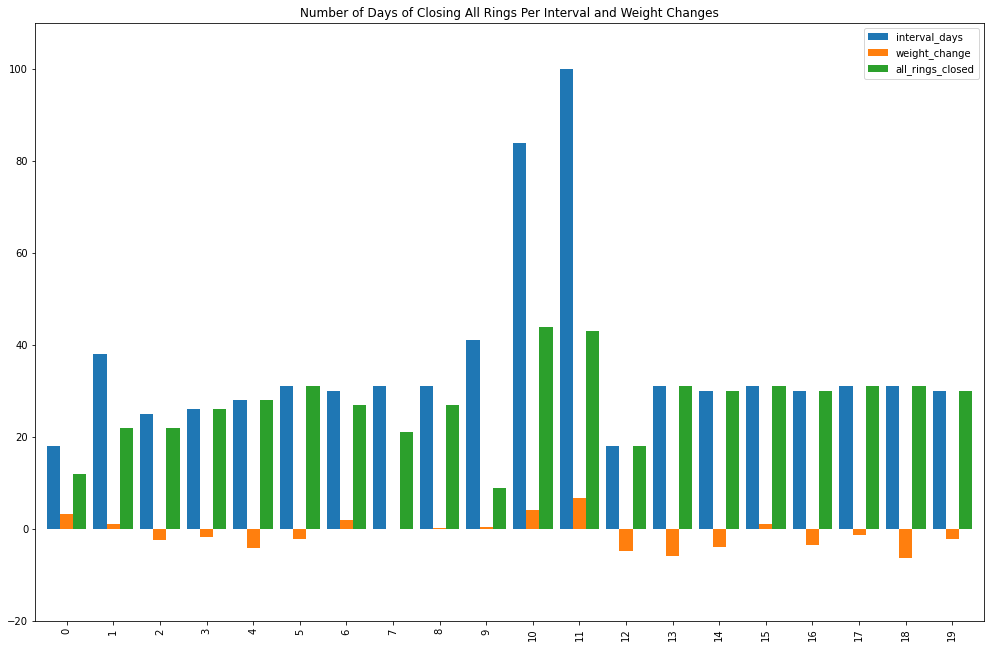

In [12]:
interval_allrings_closed_weight_changes_bar_plot = interval_activity_totals_weight_changes.plot.bar(
    title="Number of Days of Closing All Rings Per Interval and Weight Changes",
    y=["interval_days", "weight_change", "all_rings_closed"],
    figsize=(17, 11), width=0.85, ylim=(-20, 110))

For the intervals with weight losses, the number of days of closing all rings matches or is close to the number of days in the interval period. Period 11 spurred me to close all of my daily rings as often as possible, which turned out to be every day from periods 12 to 19.

#### Closing Rings and Periods of Weight Gains

In [13]:
interval_closed_rings_weight_gains = \
interval_activity_totals_weight_changes.loc[interval_activity_totals_weight_changes["weight_change"] > 1, 
                                            ["index", "interval_days", "weight_change", 
                                             "energy_ring_closed", "exercise_ring_closed", "stand_ring_closed", 
                                             "all_rings_closed"]]

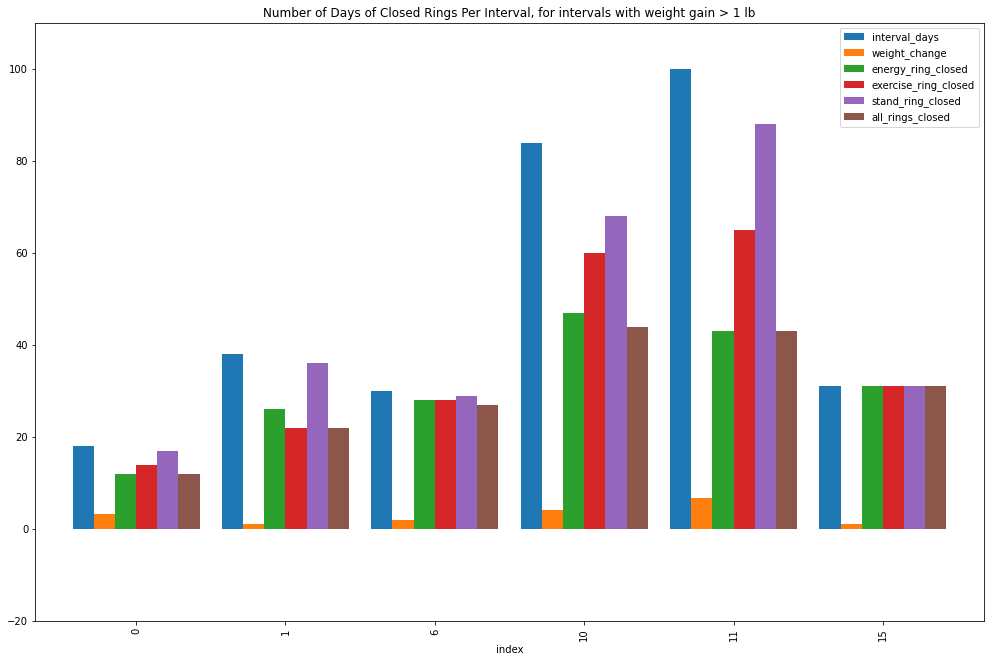

In [14]:
interval_closed_rings_weight_gain_bar_plot = interval_closed_rings_weight_gains.plot.bar(
    title="Number of Days of Closed Rings Per Interval, for intervals with weight gain > 1 lb",
    x="index",
    y=["interval_days", "weight_change", "energy_ring_closed", 
       "exercise_ring_closed", "stand_ring_closed", "all_rings_closed"],
    figsize=(17, 11), width=0.85, ylim=(-20, 110))

Standing and moving around after every hour of sitting is good practice. I like it. However, the stand ring has no bearing on weight reduction or weight maintenance, so it's not an important metric to me.

It is very easy to close the Exercise Ring without burning many calories, just walk at a slow pace for 30 minutes. I closed more exercise rings than move rings (energy_ring_closed in the graph) during the weight-gain intervals.

The daily Move Ring goal is a personalized feature. I don't remember Apple Watch's default calories goal for the Move Ring , but I turned up the minimum calories to burn per day.


### The Move Ring is the One Ring to Rule Them All? 

In [15]:
interval_activity_averages = pd.read_csv(f"{study_path}/month_firstdate_intervals_activity_averages.csv")

In [16]:
interval_activity_averages_weight_changes = pd.merge(interval_weights, 
                                                     interval_activity_averages, 
                                                     left_on="interval_key", 
                                                     right_on="interval_key")

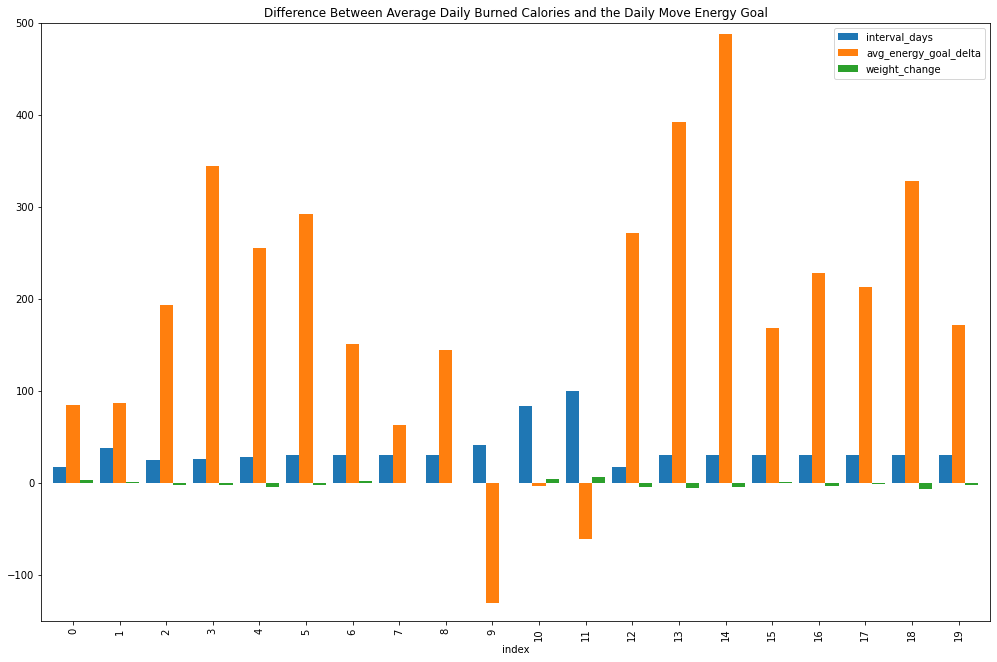

In [17]:
interval_activity_averages_weight_changes_bar_plot = interval_activity_averages_weight_changes.plot.bar(
    title="Difference Between Average Daily Burned Calories and the Daily Move Energy Goal",
    x="index",
    y=["interval_days", "avg_energy_goal_delta", "weight_change"],
    figsize=(17, 11), width=0.85, ylim=(-150, 500)
)

1. Interval 9 should be ignored because my Apple Watch was not on my wrist for a few days. I had sent it to Apple for servicing. 

2. Intervals 10 and 11 have the most noticeable weight gain; both intervals show that on average, I did not meet my daily Move calories goal.

3. Burning the most calories per interval does not translate to the highest weight loss (see interval 14). Intervals 13, 14 and 18 have nearly-identical interval lengths but interval 18 with the least calories among the three has the highest weight loss. The reason is diet. I started a five-week food-experiment during interval 18 and added eggplants and bittermelons to my daily meals, and the change contributed to the weight loss. 

In general, the Move Ring is the ring that rules the weight-loss domain.  


In [18]:
#interval_activity_averages_weight_changes.loc[:, ["interval_days", "avg_energy_goal_delta", "weight_change"]]